Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [5]:
NAME = "Victoria Anikanova"
COLLABORATORS = "BPM185"

---

# Интерполяция при помощи полиномов Лагранжа.

In [6]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = len(self.xk)
        y = 0
        for k in range(n):
            p = 1
            for j in range(n):
                if k != j:
                    p = p * (x - self.xk[j])/(self.xk[k] - self.xk[j])
            y = y + p * self.yk[k]
        return y 

In [7]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


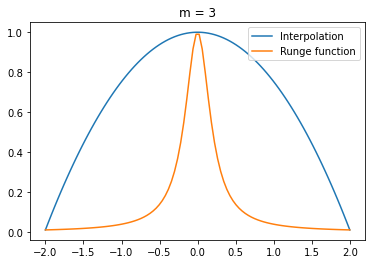

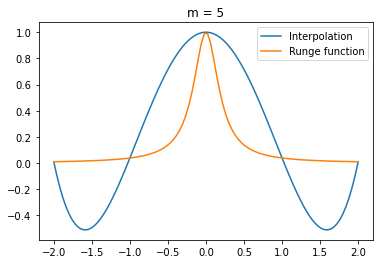

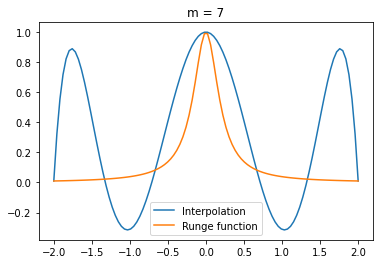

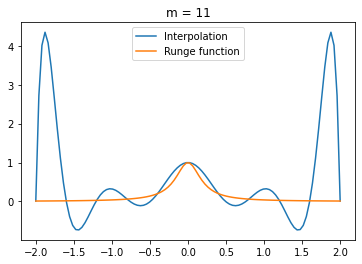

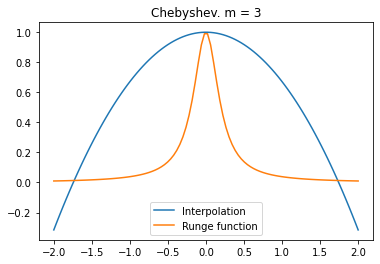

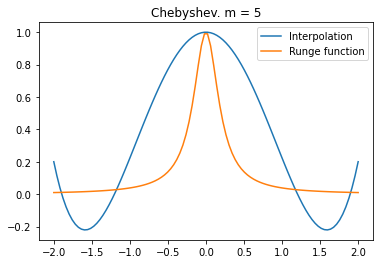

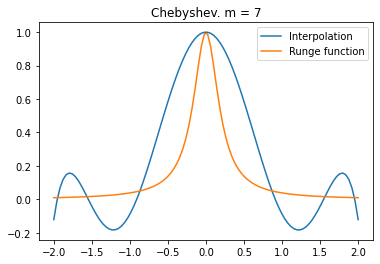

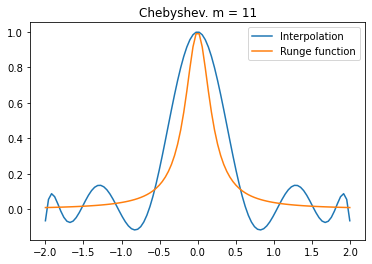

In [8]:
import matplotlib.pyplot as plt
import math

x_plot = np.linspace(-2, 2, 100)
y_plot_runge = runge_func(x_plot)

def chebyshev_nodes(m):
    nodes = []
    for i in range(m):
        nodes.append(2 * math.cos(math.pi * (2 * i + 1)/(2 * m))) # 2 for [-2, 2]
    return np.array(nodes)

for i in (3, 5, 7, 11):
    xx = np.linspace(-2, 2, i)
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    y_plot_lagr = lagr(x_plot)
    plt.plot(x_plot, y_plot_lagr)
    plt.plot(x_plot, y_plot_runge)
    plt.title(f'm = {i}')
    plt.legend(["Interpolation", "Runge function"])
    plt.show()

for i in (3, 5, 7, 11):
    xx = chebyshev_nodes(i)
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    y_plot_lagr = lagr(x_plot)
    plt.plot(x_plot, y_plot_lagr)
    plt.plot(x_plot, y_plot_runge)
    plt.title(f'Chebyshev. m = {i}')
    plt.legend(["Interpolation", "Runge function"])
    plt.show()
